In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [7]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/160.8 kB ? eta -:--:--
     ------------------------------------ - 153.6/160.8 kB 3.1 MB/s eta 0:00:01
     -------------------------------------- 160.8/160.8 kB 2.4 MB/s eta 0:00:00
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   ---- ----------------------------------- 0.9/7.6 MB 19.8 MB/s eta 0:00:01
   ----------- ---------------------------- 2.2/7.6 MB 23.2 MB/s eta 0:00:01
   --------------------- ------------------ 4.0/7.6 MB 28.5 MB/s eta 0:00:01
   ---------------------------- ----------- 5.5/7.6 MB 32.0 MB/s eta 0:00:01
   ----------------------------------- ---- 6.7/7.6 MB 30.7 MB/s eta 0:00:01
   ---------------------------------------  7.6/7.6 MB 32.5 MB/s eta 0:00:01
   ---------------------------------------- 7.6/7.6 MB 27.1 MB/s eta 0:00:00
   --------------------------

In [9]:
pip install tensorflow

  Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata (3.6 kB)
  Using cached tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata (5.1 kB)
Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl (2.1 kB)
Using cached tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl (300.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
print(tf.__version__)


2.15.0


In [12]:
# Create a list with the filepaths for training and testing
train_dir = Path('C:\\Users\\dhava\\Downloads\\Fruit_Vegetable_Recognition-master\\Fruit_Vegetable_Recognition-master\\Vegetable+Fruits\\train')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

In [13]:
test_dir = Path('C:\\Users\\dhava\\Downloads\\Fruit_Vegetable_Recognition-master\\Fruit_Vegetable_Recognition-master\\Vegetable+Fruits\\test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [14]:
val_dir = Path('C:\\Users\\dhava\\Downloads\\Fruit_Vegetable_Recognition-master\\Fruit_Vegetable_Recognition-master\\Vegetable+Fruits\\validation')
val_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [18]:
def image_processing(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    labels = [str(filepath[i]).split("/")[-1] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

In [19]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)

In [8]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 3193

Number of different labels: 36

Labels: ['grapes' 'pomegranate' 'banana' 'carrot' 'garlic' 'onion' 'pineapple'
 'orange' 'capsicum' 'jalepeno' 'paprika' 'watermelon' 'raddish' 'lettuce'
 'spinach' 'tomato' 'sweetpotato' 'cauliflower' 'bell pepper' 'peas'
 'lemon' 'kiwi' 'chilli pepper' 'cabbage' 'turnip' 'eggplant' 'potato'
 'soy beans' 'pear' 'mango' 'beetroot' 'sweetcorn' 'cucumber' 'corn'
 'apple' 'ginger']


In [20]:
train_df.head(5)

,Filepath,Label
0,C:\Users\dhava\Downloads\Fruit_Vegetable_Recog...,C:\Users\dhava\Downloads\Fruit_Vegetable_Recog...
1,C:\Users\dhava\Downloads\Fruit_Vegetable_Recog...,C:\Users\dhava\Downloads\Fruit_Vegetable_Recog...
2,C:\Users\dhava\Downloads\Fruit_Vegetable_Recog...,C:\Users\dhava\Downloads\Fruit_Vegetable_Recog...
3,C:\Users\dhava\Downloads\Fruit_Vegetable_Recog...,C:\Users\dhava\Downloads\Fruit_Vegetable_Recog...
4,C:\Users\dhava\Downloads\Fruit_Vegetable_Recog...,C:\Users\dhava\Downloads\Fruit_Vegetable_Recog...


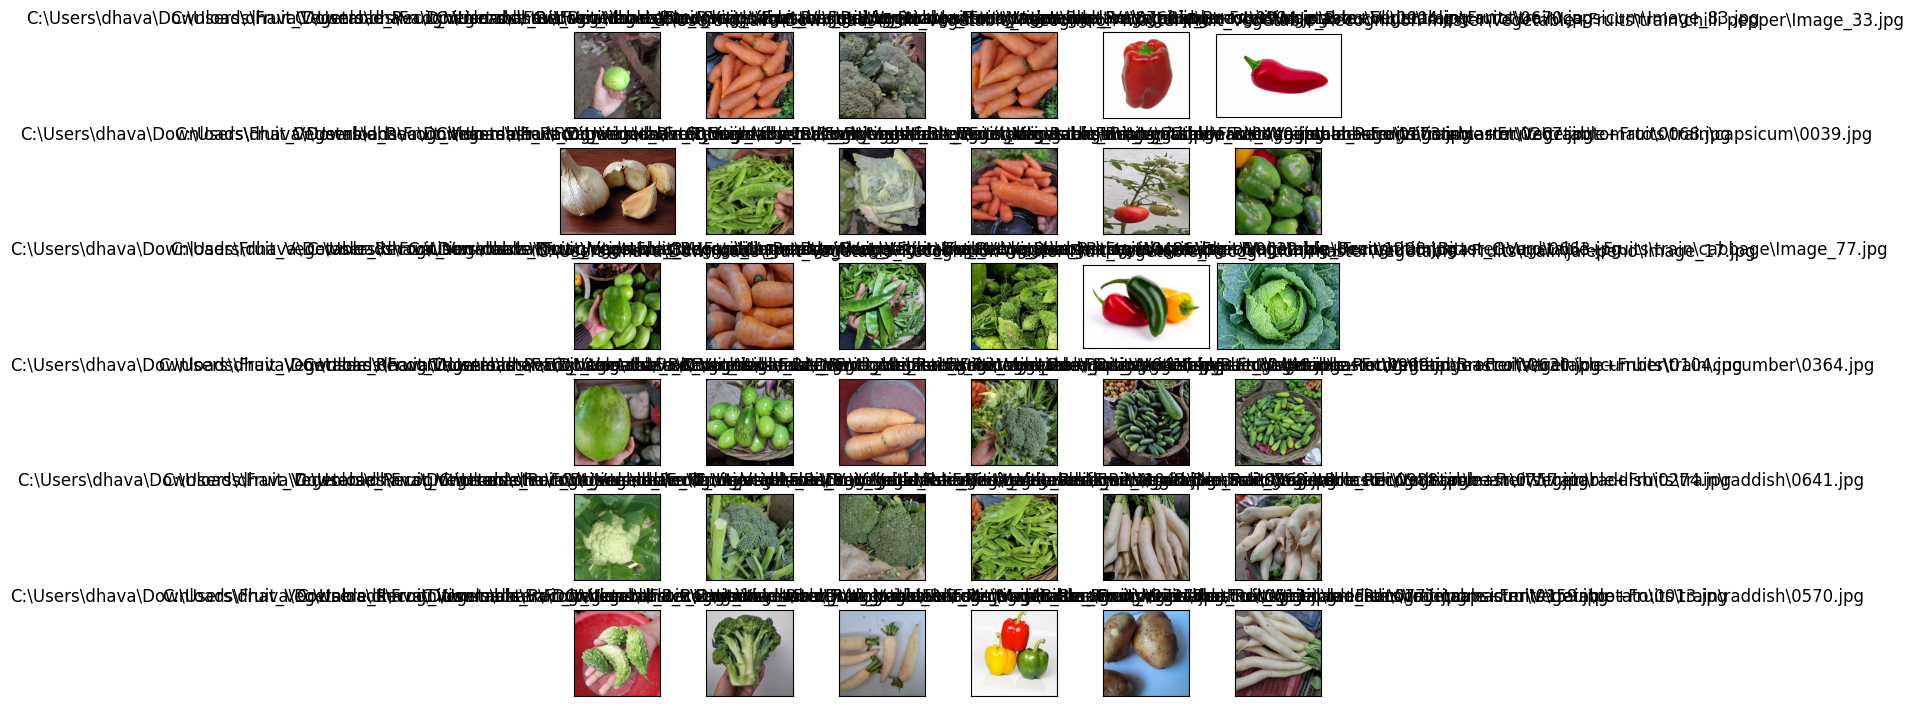

In [21]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [33]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [34]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 17855 validated image filenames belonging to 17855 classes.


In [35]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 3340 validated image filenames belonging to 3340 classes.


In [36]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 3340 validated image filenames belonging to 3340 classes.


In [37]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

In [38]:
pip install scipy

In [41]:
import scipy
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

NameError: name 'scipy' is not defined

In [17]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred]
pred1

['bell pepper',
 'carrot',
 'cauliflower',
 'paprika',
 'mango',
 'jalepeno',
 'pear',
 'beetroot',
 'raddish',
 'sweetpotato',
 'soy beans',
 'chilli pepper',
 'pear',
 'paprika',
 'turnip',
 'spinach',
 'raddish',
 'sweetcorn',
 'potato',
 'watermelon',
 'orange',
 'grapes',
 'spinach',
 'tomato',
 'pear',
 'turnip',
 'bell pepper',
 'lemon',
 'onion',
 'mango',
 'bell pepper',
 'peas',
 'onion',
 'soy beans',
 'beetroot',
 'tomato',
 'sweetpotato',
 'carrot',
 'lemon',
 'eggplant',
 'tomato',
 'eggplant',
 'bell pepper',
 'spinach',
 'sweetpotato',
 'pomegranate',
 'cucumber',
 'raddish',
 'paprika',
 'lettuce',
 'peas',
 'apple',
 'ginger',
 'pomegranate',
 'ginger',
 'sweetcorn',
 'pomegranate',
 'lemon',
 'raddish',
 'apple',
 'beetroot',
 'cauliflower',
 'lettuce',
 'pineapple',
 'jalepeno',
 'carrot',
 'garlic',
 'sweetcorn',
 'onion',
 'bell pepper',
 'chilli pepper',
 'kiwi',
 'paprika',
 'sweetpotato',
 'watermelon',
 'raddish',
 'grapes',
 'paprika',
 'pineapple',
 'lettuce

In [18]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

In [19]:
img = output('../input/fruit-and-vegetable-image-recognition/test/cabbage/Image_1.jpg')
img

'cabbage'

In [20]:
model.save('FV.h5')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
